In [2]:
import numpy as np
import cv2
import os

In [3]:
cap = cv2.VideoCapture('video.avi')

In [4]:
try: 
    if not os.path.exists('frames'): 
        os.makedirs('frames') 
except OSError: 
    print ('Error: Creating directory of data') 
i = 0
while(True): 
    ret,frame = cap.read() 
    if ret: 
        name = './frames/frame' + str(i) + '.jpg'
        cv2.imwrite(name, frame) 
        i += 1
    else: 
        break
cap.release() 

In [5]:
while(True): 
    ret,frame = cap.read() 
    if ret: 
        name = 'frame' + str(currentframe) + '.jpg' 
        cv2.imwrite(name, frame) 
        currentframe += 1
    else: 
        break
cap.release() 

In [6]:
folder="./frames"
images = []
for filename in os.listdir(folder):
    img = cv2.imread(os.path.join(folder,filename))
    if img is not None:
        images.append(img)

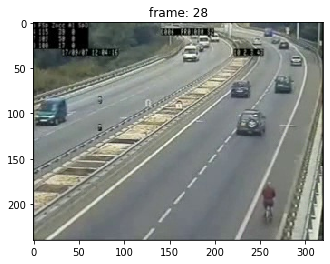

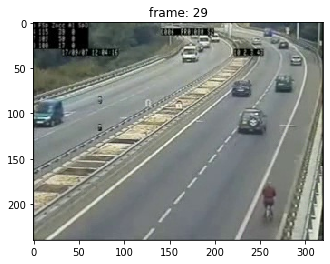

In [7]:
import matplotlib.pyplot as plt
i = 28
for frame in [i, i+1]:
    plt.imshow(cv2.cvtColor(images[frame], cv2.COLOR_BGR2RGB))
    plt.title("frame: "+str(frame))
    plt.show()

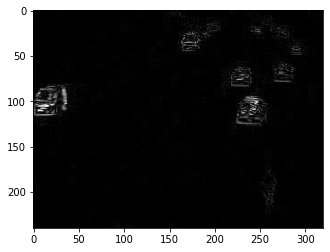

In [8]:
img1 = cv2.cvtColor(images[i], cv2.COLOR_BGR2GRAY)
img2 = cv2.cvtColor(images[i+1], cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.absdiff(img1,img2), cmap = 'gray')
plt.show()

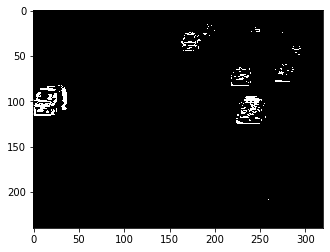

In [9]:
diff_image = cv2.absdiff(img1, img2)

# perform image thresholding
ret, thresh = cv2.threshold(diff_image, 30, 255, cv2.THRESH_BINARY)

# plot image after thresholding
plt.imshow(thresh, cmap = 'gray')
plt.show()

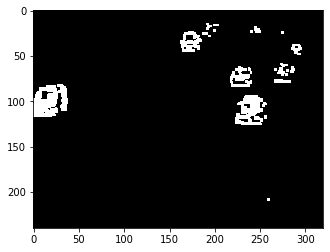

In [10]:
# apply image dilation
kernel = np.ones((3,3),np.uint8)
dilated = cv2.dilate(thresh,kernel,iterations = 1)

# plot dilated image
plt.imshow(dilated, cmap = 'gray')
plt.show()

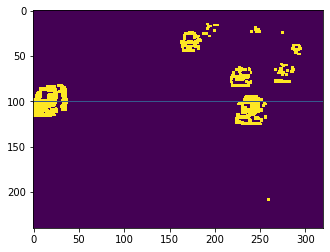

In [12]:
plt.imshow(dilated)
cv2.line(dilated, (0, 100),(450,100),(70, 0, 0))
plt.show()

In [13]:
contours, hierarchy = cv2.findContours(thresh.copy(),cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)
valid_cntrs = []

for i,cntr in enumerate(contours):
    x,y,w,h = cv2.boundingRect(cntr)
    if (x <= 200) & (y >= 80) & (cv2.contourArea(cntr) >= 25):
        valid_cntrs.append(cntr)

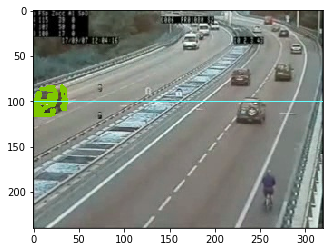

In [14]:
dmy = images[28].copy()

cv2.drawContours(dmy, valid_cntrs, -1, (127,200,0), 2)
cv2.line(dmy, (0, 100),(450,100),(100, 255, 255))
plt.imshow(dmy)
plt.show()

In [15]:
kernel = np.ones((4,4),np.uint8)
font = cv2.FONT_HERSHEY_SIMPLEX
pathIn = "./output"
for i in range(len(images)-1):
    grayA = cv2.cvtColor(images[i], cv2.COLOR_BGR2GRAY)
    grayB = cv2.cvtColor(images[i+1], cv2.COLOR_BGR2GRAY)
    diff_image = cv2.absdiff(grayB, grayA)
    ret, thresh = cv2.threshold(diff_image, 30, 255, cv2.THRESH_BINARY)
    dilated = cv2.dilate(thresh,kernel,iterations = 1)
    contours, hierarchy = cv2.findContours(dilated.copy(), cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)
    valid_cntrs = []
    for cntr in contours:
        x,y,w,h = cv2.boundingRect(cntr)
        if (x <= 200) & (y >= 80) & (cv2.contourArea(cntr) >= 25):
            if (y >= 90) & (cv2.contourArea(cntr) < 40):
                break
            valid_cntrs.append(cntr)
    dmy = images[i].copy()
    cv2.drawContours(dmy, valid_cntrs, -1, (127,200,0), 2)
    #cv2.putText(dmy,(55, 15), font, 0.6, (0, 180, 0), 2)
    cv2.line(dmy, (0, 100),(450,100),(100, 255, 255))
    cv2.imwrite('./output/output_frame'+str(i)+'.jpg',dmy)

In [16]:
folder="./output"
op = []
for filename in os.listdir(folder):
    img = cv2.imread(os.path.join(folder,filename))
    if img is not None:
        op.append(img)

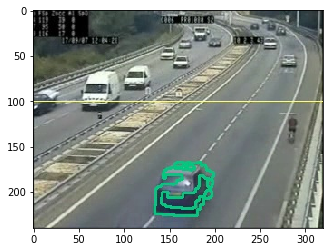

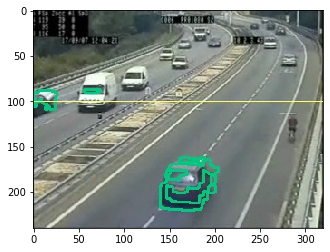

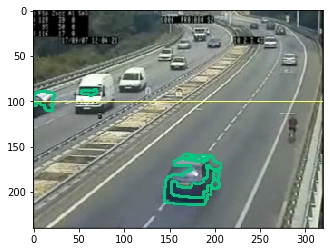

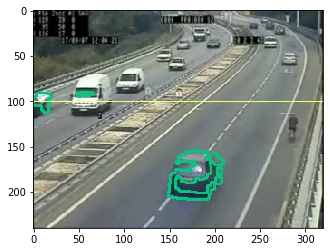

In [19]:
for x in range(82,86):
    img=cv2.cvtColor(op[x], cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.show()